In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [8]:
tickers_list = ['AXP','AMGN','BA','AAPL','CAT','CVX','CSCO','KO','DIS','DOW','GS','HD','HON','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','VZ','V','WBA','WMT']

data = yf.download(tickers_list,'2020-08-10')['Close']
data.tail()

[*********************100%***********************]  27 of 27 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MCD,MRK,MSFT,NKE,PG,TRV,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-05,147.059998,233.990005,169.630005,229.940002,207.190002,250.559998,55.759998,101.230003,176.710007,61.000000,...,236.419998,75.589996,289.519989,173.850006,142.500000,150.580002,240.210007,55.299999,46.930000,145.490005
2021-08-06,146.139999,230.149994,171.360001,231.330002,208.350006,250.589996,55.590000,101.949997,177.130005,62.000000,...,236.259995,75.440002,289.459991,172.800003,141.410004,152.820007,241.399994,55.220001,47.099998,145.229996
2021-08-09,146.089996,227.889999,170.779999,232.270004,208.889999,249.320007,55.470001,100.250000,176.720001,61.820000,...,234.679993,75.320000,288.329987,171.770004,142.179993,153.369995,240.000000,55.119999,47.439999,145.580002
2021-08-10,145.600006,227.960007,169.490005,235.779999,214.070007,243.389999,55.610001,102.080002,177.070007,63.119999,...,233.449997,75.190002,286.440002,172.270004,142.270004,154.220001,238.070007,55.480000,48.430000,148.679993
2021-08-11,145.875000,229.279999,169.335007,237.809998,216.639999,242.955002,55.720001,102.080002,177.839798,63.450001,...,235.195007,75.399498,287.410004,173.039993,142.860001,155.625107,236.460007,55.698799,49.049999,151.009995


In [18]:
#Take the first difference and remove noise in the data
data = data.pct_change()
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()
data

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MCD,MRK,MSFT,NKE,PG,TRV,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-13,-0.467492,-1.173004,-0.190139,-0.844566,-48.476757,2.986990,-6.800236,-1.808264,-1.632159,-1.685209,...,-0.541498,-0.524525,-1.081996,11.987798,-0.858869,-1.390239,-2.190042,-1.887500,26.354043,-1.023361
2020-08-14,-1.050359,-0.401640,-0.991968,-5.737446,-0.621275,-1.658053,-0.953958,-1.594787,-0.478626,1.923391,...,0.146304,-1.069048,-1.409111,-1.068383,-3.120022,-2.628540,-0.184898,-4.379703,-2.131951,-19.758836
2020-08-17,1.929444,-5.413750,285.185735,-2.777853,0.755367,-2.969343,0.873272,-0.212197,1.706520,-1.922683,...,2.029152,-22.349022,5.893524,7.563101,-1.591193,3.037610,-3.982259,-1.036875,-1.784779,2.977376
2020-08-18,-4.191640,-1.451362,-0.683285,-0.696407,-0.715215,1.179509,-0.729092,-8.441629,-0.608594,-1.615379,...,-0.001804,-1.153892,-0.128941,-2.713701,1.517571,-0.627231,-1.148431,-40.998415,-0.414455,-1.290103
2020-08-19,-0.849426,-0.326945,-1.252276,-0.455039,0.002486,-0.854084,0.002620,-0.590946,1.564497,-1.278433,...,-1.487063,-3.355562,-2.470874,0.070695,-1.727247,0.780356,-5.724282,-1.322805,0.226788,1.601349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-05,-1.269040,-1.385056,-2.611397,-2.360137,-1.683909,1.075808,-1.126256,-1.413621,-11.097024,-1.008227,...,-1.756771,-1.119729,-5.945016,1.841626,-1.046549,-2.225484,-9.443586,-0.804293,-1.418905,-3.722613
2021-08-06,-9.357317,-1.659646,0.091704,-0.586105,-0.571140,-0.995425,-3.425507,-0.232926,-0.900682,99.000394,...,-1.099955,-2.361684,-1.019726,-1.535198,-16.562098,1.098342,-0.668800,0.144280,-0.567729,-1.096329
2021-08-09,-0.945307,-0.401642,-1.331877,-0.327802,-0.537082,-43.329622,-0.291958,-3.344453,-1.973889,-1.177097,...,8.881473,-0.198358,17.838085,-0.013091,-1.711859,-0.758069,-2.170679,0.251871,0.992804,-2.348537


In [19]:
var = data.var()
var

AAPL    216.312753
AMGN    134.591578
AXP     911.384594
BA       78.112142
CAT      82.022308
CRM     290.337145
CSCO     31.130709
CVX     111.412370
DIS     851.219998
DOW     515.483354
GS      567.931945
HD       24.698626
HON      79.171710
INTC    132.704760
JNJ      73.424078
JPM     208.199637
KO      520.236655
MCD      44.457994
MRK     179.201739
MSFT    409.784835
NKE      36.909759
PG       53.462526
TRV      27.596957
V       131.523435
VZ       93.081108
WBA      98.288243
WMT     180.213313
dtype: float64

In [20]:
cov = data.cov()
cov

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MCD,MRK,MSFT,NKE,PG,TRV,V,VZ,WBA,WMT
AAPL,216.312753,6.423541,0.744725,2.955235,0.307067,-1.685870,-4.333004,-4.361862,-4.105574,-1.781821,...,0.123835,-1.034199,-5.822649,-1.432747,-2.978124,1.724132,2.619798,1.580912,1.125931,-5.221981
AMGN,6.423541,134.591578,15.808809,-0.293252,4.510876,-0.327003,-0.908502,-1.129217,-13.327558,13.500787,...,0.756610,-3.497550,-35.061348,4.034525,1.070533,0.112765,-5.998812,3.166357,1.484958,6.837387
AXP,0.744725,15.808809,911.384594,-11.369288,7.561976,-4.578104,8.033270,0.760597,5.033067,-5.655103,...,6.204662,-29.876777,-1.398442,13.677784,-22.468752,3.819361,14.875571,-8.390459,-8.363032,-5.134140
BA,2.955235,-0.293252,-11.369288,78.112142,4.138281,0.797048,-1.173296,2.468280,-2.709473,0.055456,...,-0.880251,2.504392,8.405249,0.279175,-3.028235,-4.893182,12.637566,-2.964256,-1.450963,-2.207125
CAT,0.307067,4.510876,7.561976,4.138281,82.022308,-1.202551,2.082795,-0.990673,-4.227658,5.409083,...,2.047048,-1.496515,4.447378,-4.975334,-3.752209,0.650000,-3.504755,3.387432,-0.590708,4.217519
CRM,-1.685870,-0.327003,-4.578104,0.797048,-1.202551,290.337145,-7.593612,-2.750279,26.941083,4.002777,...,0.059940,0.925507,-5.643581,-0.360325,1.027556,-2.009345,-45.426216,9.345319,-3.123793,10.450249
CSCO,-4.333004,-0.908502,8.033270,-1.173296,2.082795,-7.593612,31.130709,-1.370047,13.474303,-5.035947,...,-0.045760,-7.431628,-7.769709,3.920225,0.845381,3.258562,-3.112481,-0.466044,-0.199900,1.042097
CVX,-4.361862,-1.129217,0.760597,2.468280,-0.990673,-2.750279,-1.370047,111.412370,5.630806,-21.148394,...,-1.281060,4.260953,-3.920739,0.786904,1.289944,3.037923,-2.936693,3.431609,8.001461,1.569177
DIS,-4.105574,-13.327558,5.033067,-2.709473,-4.227658,26.941083,13.474303,5.630806,851.219998,58.074086,...,5.612300,1.366749,7.453763,-21.602646,-1.982253,7.278587,10.671549,6.522467,-2.215988,122.210230
DOW,-1.781821,13.500787,-5.655103,0.055456,5.409083,4.002777,-5.035947,-21.148394,58.074086,515.483354,...,-9.929544,17.556170,1.538332,-3.260108,-10.831849,-4.980577,13.079326,-2.907579,0.308230,57.501612


In [21]:
#Individual stock expected return
indiv_er = data.resample('M').last().pct_change().mean()
indiv_er

AAPL    -2.430518
AMGN    -2.255496
AXP     12.143611
BA      -0.063258
CAT      0.504853
CRM     -2.083472
CSCO    -0.287468
CVX     -2.734645
DIS     -0.119314
DOW    -20.952697
GS      -3.077437
HD       4.741485
HON      4.680449
INTC     3.506409
JNJ      1.312755
JPM      0.273707
KO      -2.041825
MCD      2.856538
MRK      0.033445
MSFT     0.030615
NKE      0.095349
PG      -0.744250
TRV     10.813572
V        0.283990
VZ       0.640028
WBA     -5.588856
WMT     -3.015500
dtype: float64

In [22]:
#standard devition of each stock, multiplied by 21 trading days in a month
month_sd = data.pct_change().std().apply(lambda x: x*np.sqrt(21))
month_sd = month_sd.dropna()

In [23]:
assets = pd.concat([indiv_er, month_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
AAPL,-2.430518,152.353726
AMGN,-2.255496,57.927059
AXP,12.143611,143.137142
BA,-0.063258,50.671347
CAT,0.504853,988.237083
CRM,-2.083472,143.899808
CSCO,-0.287468,631.078981
CVX,-2.734645,56.739919
DIS,-0.119314,245.111613
DOW,-20.952697,108.412365


In [26]:
p_return = []  
p_volatility = [] 
p_weights = [] 

num_assets = len(data.columns)
num_portfolios = 100000 #Number of random portfolios

In [27]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, indiv_er)
                                      
    p_return.append(returns)
    var = cov.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    month_sd = sd*np.sqrt(21) 
    p_volatility.append(month_sd)

In [28]:
sim_data = {'Returns':p_return, 'Volatility':p_volatility}

for counter, symbol in enumerate(data.columns.tolist()):
    #print(counter, symbol)
    sim_data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(sim_data)
portfolios.tail()

,Returns,Volatility,AAPL weight,AMGN weight,AXP weight,BA weight,CAT weight,CRM weight,CSCO weight,CVX weight,...,MCD weight,MRK weight,MSFT weight,NKE weight,PG weight,TRV weight,V weight,VZ weight,WBA weight,WMT weight
99995,0.147318,13.918396,0.056338,0.022792,0.033197,0.039467,0.016019,0.037335,0.039743,0.052685,...,0.052992,0.031444,0.052330,0.012216,0.048170,0.044782,0.042833,0.058268,0.017474,0.057052
99996,-0.335950,14.658971,0.044426,0.010180,0.042207,0.004227,0.056827,0.039064,0.035858,0.023427,...,0.048935,0.009861,0.021082,0.046236,0.038459,0.044182,0.051813,0.032515,0.054980,0.056367
99997,-0.551615,14.785935,0.066016,0.021936,0.005127,0.040064,0.043097,0.063392,0.002745,0.046322,...,0.019495,0.055801,0.032806,0.036109,0.048816,0.067701,0.027852,0.032892,0.009399,0.059827
99998,0.876792,16.073527,0.016754,0.002399,0.058816,0.049956,0.054580,0.064488,0.002809,0.030133,...,0.062549,0.077944,0.063638,0.028590,0.044866,0.046149,0.030035,0.059855,0.016163,0.021445
99999,0.826632,12.306344,0.009958,0.004401,0.022597,0.006200,0.059563,0.036314,0.041576,0.057746,...,0.083387,0.043804,0.056805,0.035225,0.029380,0.083711,0.007149,0.043676,0.018019,0.036279


In [29]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port #minimum volatiltiy portfolio weights

Returns        0.049814
Volatility     9.986138
AAPL weight    0.012655
AMGN weight    0.022059
AXP weight     0.014760
BA weight      0.008644
CAT weight     0.061926
CRM weight     0.023450
CSCO weight    0.091701
CVX weight     0.081595
DIS weight     0.008479
DOW weight     0.026681
GS weight      0.006758
HD weight      0.046151
HON weight     0.039146
INTC weight    0.002626
JNJ weight     0.069789
JPM weight     0.010177
KO weight      0.004654
MCD weight     0.093620
MRK weight     0.013893
MSFT weight    0.013698
NKE weight     0.053438
PG weight      0.077624
TRV weight     0.024686
V weight       0.058177
VZ weight      0.076298
WBA weight     0.027859
WMT weight     0.029454
Name: 34300, dtype: float64

In [30]:
rf = 0.0136 # riskfree rate
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port #maximum returns portfolio weights

Returns         2.213106
Volatility     13.044351
AAPL weight     0.005610
AMGN weight     0.006142
AXP weight      0.045419
BA weight       0.031672
CAT weight      0.019113
CRM weight      0.030207
CSCO weight     0.066832
CVX weight      0.011001
DIS weight      0.016069
DOW weight      0.016277
GS weight       0.025084
HD weight       0.062085
HON weight      0.069791
INTC weight     0.061609
JNJ weight      0.098362
JPM weight      0.082266
KO weight       0.030673
MCD weight      0.066073
MRK weight      0.000581
MSFT weight     0.070768
NKE weight      0.006474
PG weight       0.010572
TRV weight      0.102016
V weight        0.034154
VZ weight       0.024794
WBA weight      0.002140
WMT weight      0.004217
Name: 66002, dtype: float64

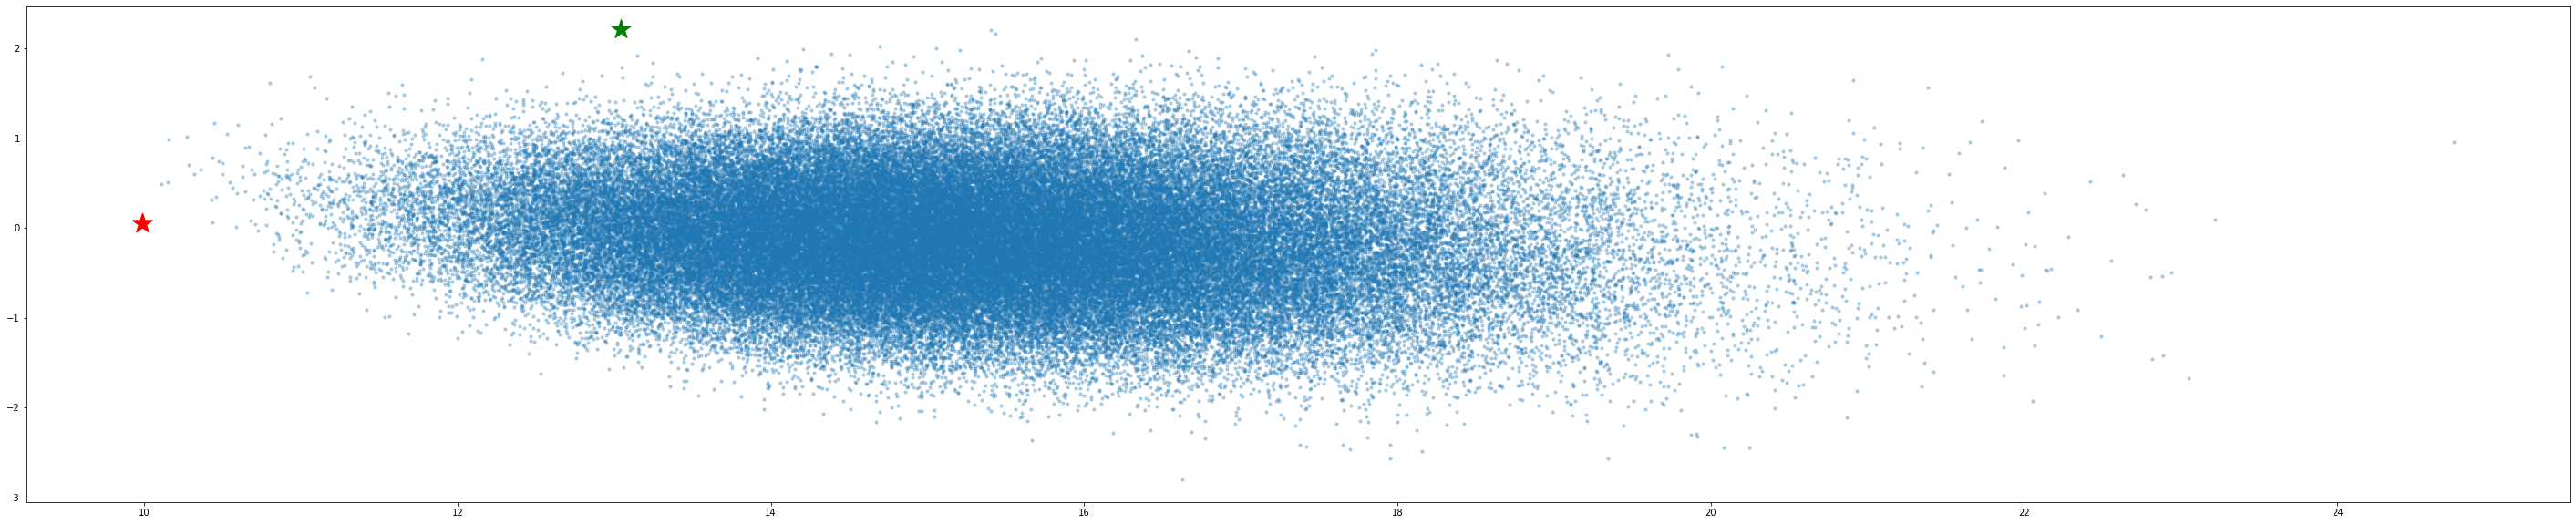

In [31]:
plt.subplots(figsize=(50, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)